In [1]:
import tensorflow as tf; print(tf.__version__)

1.10.1


In [2]:
#Read in file names and paths from the input directory
from os import walk
import os

filePath = 'input'
f = {}
for (dirpath, dirnames, filenames) in walk(filePath):
    if filenames:
        f[dirpath.rsplit('/', 1)[-1]] = list(os.path.join(dirpath, x) for x in filenames)
    
f

{'dry': ['input/dry/1367731996.CSV',
  'input/dry/1088131773.CSV',
  'input/dry/1948652171.CSV',
  'input/dry/891085006.CSV',
  'input/dry/957252430.CSV',
  'input/dry/1910189788.CSV',
  'input/dry/530759577.CSV',
  'input/dry/1344943899.CSV',
  'input/dry/78520028.CSV',
  'input/dry/1868903662.CSV',
  'input/dry/1780329192.CSV',
  'input/dry/1833935907.CSV',
  'input/dry/486296532.CSV',
  'input/dry/1610930929.CSV',
  'input/dry/1597231826.CSV',
  'input/dry/213951127.CSV',
  'input/dry/143521040.CSV',
  'input/dry/150254099.CSV',
  'input/dry/954500386.CSV',
  'input/dry/2083478664.CSV',
  'input/dry/1689595608.CSV',
  'input/dry/1816589245.CSV',
  'input/dry/1289876659.CSV',
  'input/dry/1357645682.CSV',
  'input/dry/1439407403.CSV',
  'input/dry/1894789.CSV',
  'input/dry/1794072841.CSV',
  'input/dry/1573713973.CSV',
  'input/dry/822335360.CSV',
  'input/dry/1891882976.CSV',
  'input/dry/1409536457.CSV',
  'input/dry/1361302372.CSV',
  'input/dry/1325834487.CSV',
  'input/dry/4151

In [3]:
#Read in CSV files
import pandas as pd
import numpy as np

data = []
labels = []
label_names = []

index = 0
for key in f:
    for fileName in f[key]:
        #read csv
        df = pd.read_csv(fileName, header=None, usecols=lambda x: x < 64)
        #add to data
        data.append(df.values[0])
        #Add flipped data
        flip_0 = np.flip(df.values[0].reshape((8,8)), 0)
        flip_0_1 = np.flip(flip_0, 1)
        data.append(flip_0.reshape(64))
        data.append(flip_0_1.reshape(64))
        flip_1 = np.flip(df.values[0].reshape((8,8)), 1)
        data.append(flip_1.reshape(64))
        #create noisy data
        noise_level = 0.2
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(df.values[0] + noise);
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_0_1.reshape(64) + noise)
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_0.reshape(64))
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_1.reshape(64))
        noise_level = 0.5
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(df.values[0] + noise);
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_0_1.reshape(64) + noise)
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_0.reshape(64))
        noise = np.random.normal(-noise_level, noise_level, df.values[0].shape)
        data.append(flip_1.reshape(64))
        #add labels - for original and flipped
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
        labels.append(index)
    #add label name    
    label_names.append(key)
    #count numver of classes
    index += 1



In [4]:
np.random.normal(-0.2, 0.2, df.values[0].shape)


array([-0.32104773, -0.31931822,  0.05881312, -0.69687529, -0.43154455,
       -0.41569883, -0.31720794, -0.30719891, -0.08554748, -0.16306696,
       -0.21894634,  0.04712638, -0.14885402, -0.29197001, -0.37954894,
       -0.19717804, -0.12251484, -0.0138481 ,  0.21312375, -0.52520563,
       -0.64836684, -0.05680236, -0.15023337,  0.17224859, -0.16369468,
        0.04603944,  0.17796804,  0.22024273, -0.20049808,  0.00227568,
       -0.15873861, -0.31377332, -0.11443015, -0.05325898, -0.25832652,
       -0.14923019, -0.00115019, -0.28355902, -0.00282242, -0.37889573,
        0.02947173,  0.13863236, -0.43849708, -0.38235955, -0.56319387,
       -0.3597017 , -0.54908889, -0.39118477,  0.10923904, -0.12529558,
        0.04299845, -0.24434893, -0.14098997, -0.26820146, -0.18263395,
       -0.16512362, -0.08492407, -0.12642994, -0.56533848, -0.02428752,
        0.09768205, -0.1938111 , -0.50629632, -0.34708666])

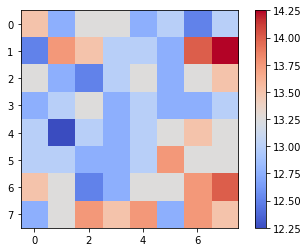

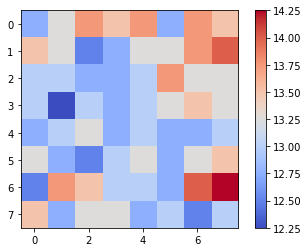

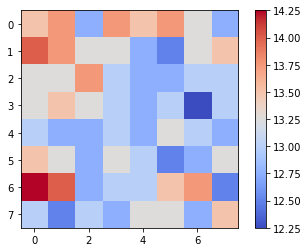

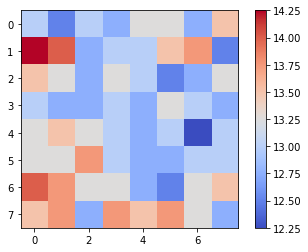

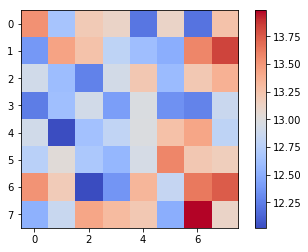

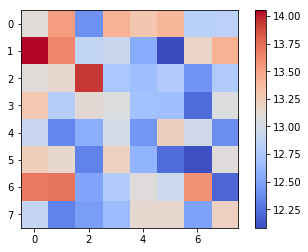

In [5]:
#Print test images
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(6):
    plt.imshow(data[i].reshape((8,8)), cmap='coolwarm')
    plt.colorbar()
    plt.show()

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,19.5,19.25,20.5,20.0,19.5,20.0,19.75,19.5,19.75,19.75,...,18.25,18.5,19.25,20.0,20.0,18.75,18.75,18.25,18.25,18.75


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler_model = MinMaxScaler()
scaler_model.fit(data)
data = scaler_model.transform(data)

In [27]:
from sklearn.externals import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler_model, scaler_filename) 

['scaler.save']

In [8]:
print(data.shape)
data

(3264, 64)


array([[0.27837286, 0.20473621, 0.27192323, ..., 0.24226303, 0.3299858 ,
        0.28070211],
       [0.21986255, 0.24659219, 0.31237194, ..., 0.26220348, 0.23145429,
        0.24182114],
       [0.27837286, 0.28844818, 0.23147452, ..., 0.28214393, 0.25116059,
        0.28070211],
       ...,
       [0.67072659, 0.6039481 , 0.66146219, ..., 0.87728795, 0.7475477 ,
        0.7603258 ],
       [0.72695189, 0.81164805, 0.81798081, ..., 0.82053598, 0.802937  ,
        0.74727371],
       [0.74645533, 0.79072005, 0.81798081, ..., 0.82053598, 0.8226433 ,
        0.72783323]])

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

X_train = np.array(X_train);
y_train = np.array(y_train);
X_test = np.array(X_test);
y_test = np.array(y_test);



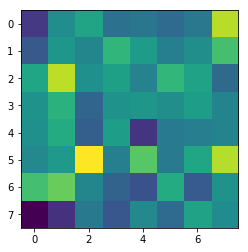

In [10]:
img = X_train[0].reshape((8,8))
img = np.flip(img, 0)
plt.imshow(img)

In [11]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout

num_classes = index
resnet_weights_path = filePath + '/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

model = Sequential()
model.add(Dropout(0.05));
# model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
model.add(Dense(33, activation='relu'))
model.add(Dropout(0.05));
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.025));
# model.add(Dense(4, activation='relu'))
#model.add(Dropout(0.025));
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2));
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(4, activation='relu'))
# model.add(Dropout(0.1));
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.2));
# model.add(Dense(8, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
# model.layers[0].trainable = False

In [12]:
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
sgd = optimizers.SGD(lr=0.1, clipnorm=1.)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:

#data
model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        validation_steps=1,
        steps_per_epoch=5000,
        epochs=1,
        callbacks=[tensorboard])


Epoch 1/1
5000/5000 [==============================] - 15s 3ms/step - loss: 0.3886 - acc: 0.8207 - val_loss: 0.2780 - val_acc: 0.8908


In [14]:
print(model.metrics_names)
print(model.evaluate(X_test, y_test))
print(model.evaluate(X_train, y_train))


['loss', 'acc']
980/980 [==============================] - 0s 15us/step
[0.2780133586757037, 0.8908163265306123]
2284/2284 [==============================] - 0s 9us/step
[0.24432061291617813, 0.9163747811902008]


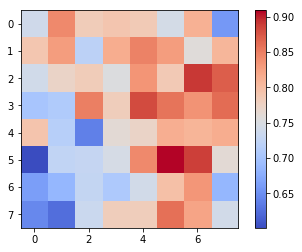

Should be: pee
['dry', 'pee']
[[0.15477042 0.8452296 ]]
Prediction: pee


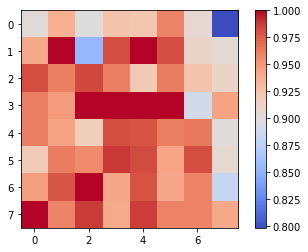

Should be: dry
['dry', 'pee']
[[0.67301035 0.3269897 ]]
Prediction: dry


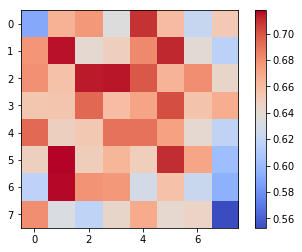

Should be: dry
['dry', 'pee']
[[0.716375 0.283625]]
Prediction: dry


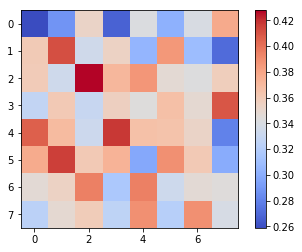

Should be: dry
['dry', 'pee']
[[0.9682994  0.03170065]]
Prediction: dry


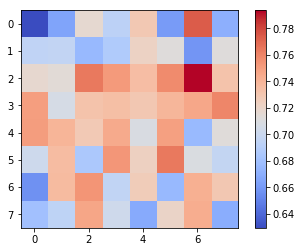

Should be: dry
['dry', 'pee']
[[0.77006954 0.22993043]]
Prediction: dry


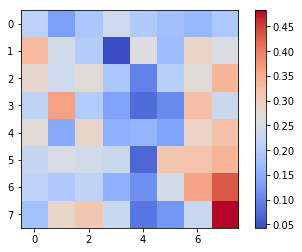

Should be: pee
['dry', 'pee']
[[0.26795253 0.73204744]]
Prediction: pee


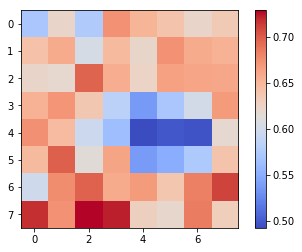

Should be: pee
['dry', 'pee']
[[0.06942894 0.9305711 ]]
Prediction: pee


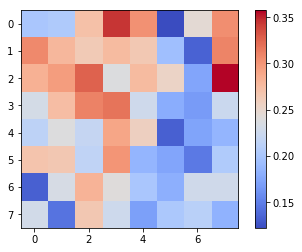

Should be: pee
['dry', 'pee']
[[0.36636445 0.6336355 ]]
Prediction: pee


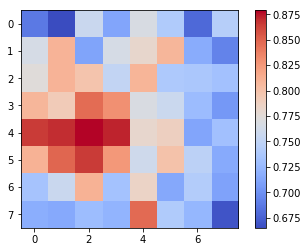

Should be: dry
['dry', 'pee']
[[0.75398034 0.24601966]]
Prediction: dry


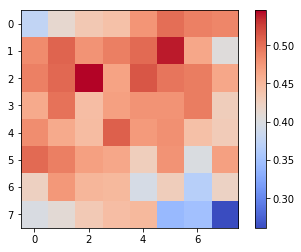

Should be: dry
['dry', 'pee']
[[0.9417736  0.05822644]]
Prediction: dry


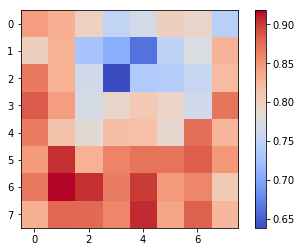

Should be: pee
['dry', 'pee']
[[0.07086686 0.9291331 ]]
Prediction: pee


In [15]:
import matplotlib.pyplot as plt


for i in range (0,11):
    image = X_test[i]
    pred = model.predict(X_test[i:i+1])
    
    plt.imshow(image.reshape((8,8)), cmap='coolwarm')
    plt.colorbar()
    plt.show()
    print("Should be: " + label_names[y_test[i]])
    print(label_names)
    print(pred)
    print("Prediction: " + label_names[pred.argmax()]) 


In [22]:
type(X_test[0:0+1])
X_test[0:0+1].shape
type(X_test[0:0+1][0])

numpy.ndarray

In [16]:
#Save the model
model.save("test_model.h5");